MNIST Images: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
MNIST Lables: [5 0 4 ... 5 6 8]
Digit 0
Mnist Images 5923
Mnist Labels 5923
Digit 1
Mnist Images 6742
Mnist Labels 6742
Digit 2
Mnist Images 5958
Mnist Labels 5958
Digit 3
Mnist Images 6131
Mnist Labels 6131
Digit 4
Mnist Images 5842
Mnist Labels 5842
Digit 5
Mnist Images 5421
Mnist Labels 5421
Digit 6
Mnist Images 5918
Mnist Labels 5918
Digit 7
Mnist Images 6265
Mnist Labels 6265
Digit 8
Mnist Images 5851
Mnist Labels 5851
Digit 9
Mnist Images 5949
Mnist Labels 5949


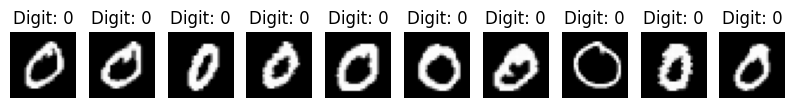

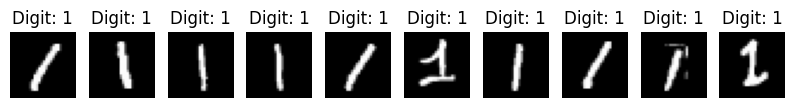

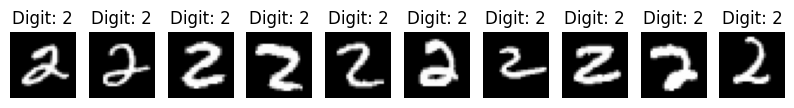

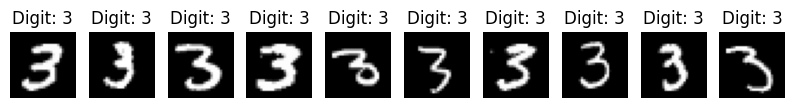

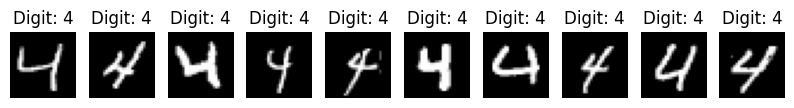

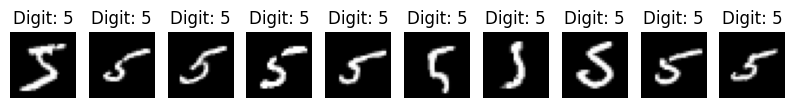

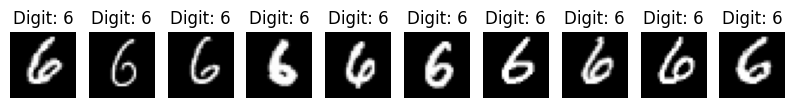

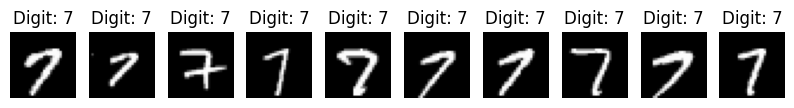

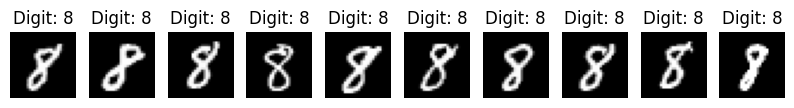

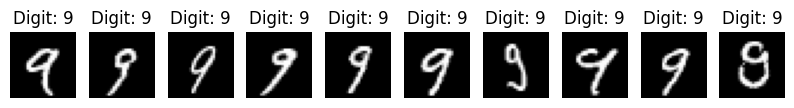

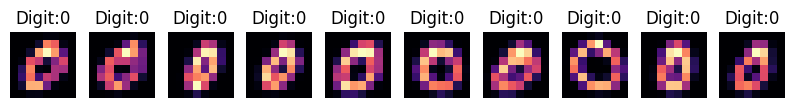

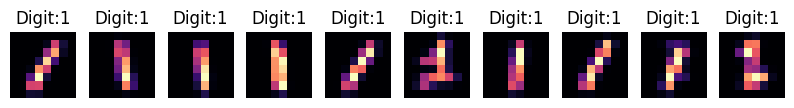

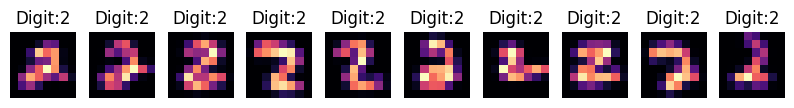

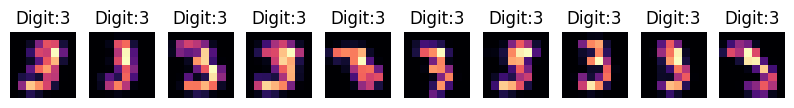

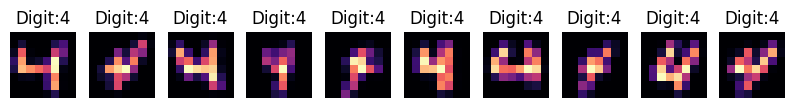

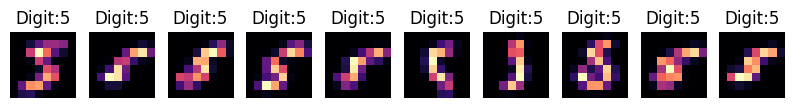

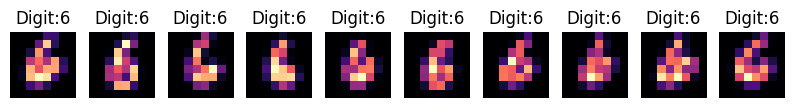

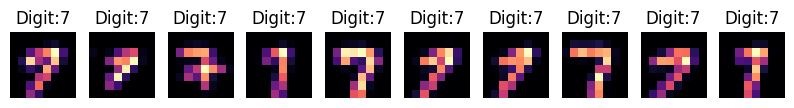

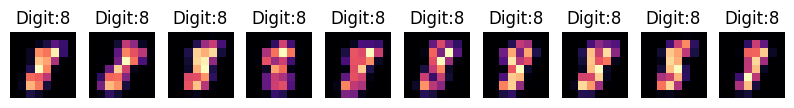

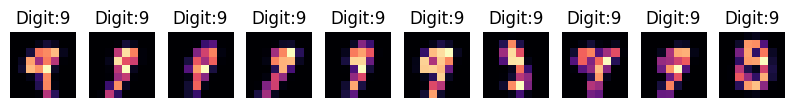

Digit zero [[0.00000000e+00 0.00000000e+00 5.02834929e-05 ... 5.04943733e-03
  2.54318312e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.64488586e-06 ... 2.44551014e-02
  2.39711887e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.95373525e-05 ... 5.52719367e-02
  4.29082453e-06 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.33822537e-04
  1.93436207e-08 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.30475596e-07 ... 1.49584173e-04
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.45087318e-07 ... 5.72852573e-04
  3.43886591e-08 0.00000000e+00]]
Digit one [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.41505166e-07
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.26532695e-02 ... 2.13737652e+00
  3.00926886e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.68420508e-04 ... 4.41504330e-01
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00300256e-08
  0.0000000

In [1]:
# Quantum Amplitude Encoding

import idx2numpy
import numpy as np
import torch
from PIL import Image


def load_MNIST_dataset_Images(file_path): # for now trial on mnist dataset
    images = idx2numpy.convert_from_file(file_path)
    images = images.reshape(images.shape[0], -1)
    images = images.astype(np.float64)
    return images

def load_MNIST_dataset_Labels(file_path):
    labels = idx2numpy.convert_from_file(file_path)
    return labels

# Download the MNIST Dataset from Kaggle and Change this directory to your Directory
train_images_file = r"D:\Downloads Now\archive\train-images.idx3-ubyte"
train_labels_file = r"D:Downloads Now\archive\train-labels.idx1-ubyte"

mnist_images = load_MNIST_dataset_Images(train_images_file)
mnist_labels = load_MNIST_dataset_Labels(train_labels_file)

print('MNIST Images:', mnist_images)
print('MNIST Lables:', mnist_labels)


# Separating the load dataset into train labels and the train digits 

def separate_images_and_labels(images , labels , digit):
    digit_images = []
    digit_labels = []
    for image,label in zip(images,labels):
        if label == digit:
            digit_images.append(image)
            digit_labels.append(label)
    return digit_images,digit_labels

digits_to_separate = [0,1,2,3,4,5,6,7,8,9]

digit_image = {}
digit_label = {}

for digit in digits_to_separate:
    digit_image[digit], digit_label[digit] = separate_images_and_labels(mnist_images,mnist_labels,digit)

for digit in digits_to_separate:
    print('Digit', digit)
    print('Mnist Images', len(digit_image[digit]))
    print('Mnist Labels', len(digit_label[digit]))

import matplotlib.pyplot as plt

num_samples = 10 

for digit in digit_image.keys():
    sample_images = digit_image[digit][:num_samples]
    plt.figure(figsize = (10,2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(sample_images[i].reshape(28,28), cmap = 'gray')
        plt.title(f"Digit: {digit}")
        plt.axis('off')
    plt.show()

# Resize the image to a higher accuracy and match the dimensions of the qubits

from skimage.transform import resize

def resize_images(images, new_size = (8,8)):
    resized_images = []
    for image in images:
        resized_image = resize(image.reshape(28,28), new_size)
        resized_images.append(resized_image.flatten())
    return resized_images

new_size = (8,8)

resized_digit_images = {}
for digit in digit_image.keys():
    resized_digit_images[digit] = resize_images(digit_image[digit], new_size = new_size)

for digit in digit_image.keys():
    sample_images = resized_digit_images[digit][:num_samples]
    plt.figure(figsize =(10,2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(sample_images[i].reshape(new_size), cmap = 'magma')
        plt.title(f"Digit:{digit}")
        plt.axis('off')
    plt.show()

# Converting all the digits in to arrays

Digit_zero = []

for image in resized_digit_images[0]:
    Digit_zero_ = image
    Digit_zero.append(Digit_zero_)

Digit_zero = np.array(Digit_zero)

print('Digit zero',Digit_zero)

Digit_one = []

for image in resized_digit_images[1]:
    Digit_one_ = image
    Digit_one.append(Digit_one_)

Digit_one = np.array(Digit_one)

print('Digit one',Digit_one)

Digit_two = []

for image in resized_digit_images[2]:
    Digit_two_ = image
    Digit_two.append(Digit_two_)

Digit_two = np.array(Digit_two)

print('Digit two',Digit_two)

Digit_three = []

for image in resized_digit_images[3]:
    Digit_three_ = image
    Digit_three.append(Digit_three_)

Digit_three = np.array(Digit_three)

print('Digit three',Digit_three)

Digit_four = []

for image in resized_digit_images[4]:
    Digit_four_ = image
    Digit_four.append(Digit_four_)

Digit_four = np.array(Digit_four)

print('Digit four',Digit_four)

Digit_fifth = []

for image in resized_digit_images[5]:
    Digit_fifth_ = image
    Digit_fifth.append(Digit_fifth_)

Digit_fifth = np.array(Digit_fifth)

print('Digit fifth',Digit_fifth)

Digit_sixth = []

for image in resized_digit_images[6]:
    Digit_sixth_ = image
    Digit_sixth.append(Digit_sixth_)
    

Digit_sixth = np.array(Digit_sixth)

print('Digit Sixth',Digit_sixth)

Digit_seventh = []

for image in resized_digit_images[7]:
    Digit_seventh_ = image
    Digit_seventh.append(Digit_seventh_)

Digit_seventh = np.array(Digit_seventh)

print('Digit seventh',Digit_seventh)

Digit_eigth = []

for image in resized_digit_images[8]:
    Digit_eigth_ = image
    Digit_eigth.append(Digit_eigth_)

Digit_eigth = np.array(Digit_eigth)

print('Digit eigth',Digit_eigth)

Digit_nineth = []

for image in resized_digit_images[9]:
    Digit_nineth_ = image
    Digit_nineth.append(Digit_nineth_)

Digit_nineth = np.array(Digit_nineth)

print('Digit nineth',Digit_nineth)

# Digit zero to Nine grey scale matrix conversion by reshaping a row array into a (N,N) size

# Quantum Amplitude Encoding of MNIST Dataset

N = 8

Digit_zero_ = []

for i in range(len(Digit_zero)):
    Digit_zero_.append((Digit_zero[i].reshape(N**2))/np.linalg.norm(Digit_zero[i]))

Digit_one_ = []

for i in range(len(Digit_one)):
    Digit_one_.append((Digit_one[i].reshape(N**2))/np.linalg.norm(Digit_one[i]))

Digit_two_ = []

for i in range(len(Digit_two)):
    Digit_two_.append((Digit_two[i].reshape(N**2))/np.linalg.norm(Digit_two[i]))

Digit_three_ = []

for i in range(len(Digit_three)):
    Digit_three_.append((Digit_three[i].reshape(N**2))/np.linalg.norm(Digit_three[i]))

Digit_four_ = []

for i in range(len(Digit_four)):
    Digit_four_.append((Digit_four[i].reshape(N**2))/np.linalg.norm(Digit_four[i]))

Digit_five_ = []

for i in range(len(Digit_fifth)):
    Digit_five_.append((Digit_fifth[i].reshape(N**2))/np.linalg.norm(Digit_fifth[i]))

Digit_sixth_ = []

for i in range(len(Digit_sixth)):
    Digit_sixth_.append((Digit_sixth[i].reshape(N**2))/np.linalg.norm(Digit_sixth[i]))

Digit_seventh_ = []

for i in range(len(Digit_seventh)):
    Digit_seventh_.append((Digit_seventh[i].reshape(N**2))/np.linalg.norm(Digit_seventh[i]))

Digit_eigth_ = []

for i in range(len(Digit_eigth)):
    Digit_eigth_.append((Digit_eigth[i].reshape(N**2))/np.linalg.norm(Digit_eigth[i]))

Digit_nineth_ = []

for i in range(len(Digit_nineth)):
    Digit_nineth_.append((Digit_nineth[i].reshape(N**2))/np.linalg.norm(Digit_nineth[i]))


Input_state_vector_zero = np.array(Digit_zero_)
Input_state_vector_one = np.array(Digit_one_)
Input_state_vector_two = np.array(Digit_two_)
Input_state_vector_three = np.array(Digit_three_)
Input_state_vector_four = np.array(Digit_four_)
Input_state_vector_fifth = np.array(Digit_five_)
Input_state_vector_sixth = np.array(Digit_sixth_)
Input_state_vector_seventh = np.array(Digit_seventh_)
Input_state_vector_eigth = np.array(Digit_eigth_)
Input_state_vector_nineth = np.array(Digit_nineth_)

input_state_vectors = []

input_state_vectors.append(Input_state_vector_zero)
input_state_vectors.append(Input_state_vector_one)
input_state_vectors.append(Input_state_vector_two)
input_state_vectors.append(Input_state_vector_three)
input_state_vectors.append(Input_state_vector_four)
input_state_vectors.append(Input_state_vector_fifth)
input_state_vectors.append(Input_state_vector_sixth)
input_state_vectors.append(Input_state_vector_seventh)
input_state_vectors.append(Input_state_vector_eigth)
input_state_vectors.append(Input_state_vector_nineth)

input_state_vectors = np.concatenate(input_state_vectors,axis = 0)

labels = []
for i in range(10):
    labels.append(i)

print(labels)

labels_zero = [labels[0]]*Digit_zero.shape[0]
labels_one  = [labels[1]]*Digit_one.shape[0]
labels_two  = [labels[2]]*Digit_two.shape[0]
labels_three  = [labels[3]]*Digit_three.shape[0]
labels_four  = [labels[4]]*Digit_four.shape[0]
labels_five  = [labels[5]]*Digit_fifth.shape[0]
labels_six  = [labels[6]]*Digit_sixth.shape[0]
labels_seven  = [labels[7]]*Digit_seventh.shape[0]
labels_eigth  = [labels[8]]*Digit_eigth.shape[0]
labels_nineth  = [labels[9]]*Digit_nineth.shape[0]
labels_zero = np.array(labels_zero,dtype = int)
labels_one = np.array(labels_one,dtype = int)
labels_two = np.array(labels_two,dtype = int)
labels_three = np.array(labels_three,dtype = int)
labels_four = np.array(labels_four,dtype = int)
labels_five = np.array(labels_five,dtype = int)
labels_six = np.array(labels_six,dtype = int)
labels_seven = np.array(labels_seven,dtype = int)
labels_eigth = np.array(labels_eigth,dtype = int)
labels_nineth = np.array(labels_nineth,dtype = int)

labels_new_train = np.concatenate((labels_zero,labels_one))
labels_new_train = np.concatenate((labels_new_train,labels_two))
labels_new_train = np.concatenate((labels_new_train,labels_three))
labels_new_train = np.concatenate((labels_new_train,labels_four))
labels_new_train = np.concatenate((labels_new_train,labels_five))
labels_new_train = np.concatenate((labels_new_train,labels_six))
labels_new_train = np.concatenate((labels_new_train,labels_seven))
labels_new_train = np.concatenate((labels_new_train,labels_eigth))
labels_new_train = np.concatenate((labels_new_train,labels_nineth))


target_states_combined = np.zeros((60000, 64), dtype=np.float64)
target_states_combined[0:Digit_zero.shape[0], 0] = 1
target_states_combined[Digit_zero.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0], 7] = 1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]:Digit_zero.shape[0] + Digit_one.shape[0]+Digit_two.shape[0], 14] = 1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0], 21] = 1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0], 28] = 1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0], 35] = 1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0], 42] = 1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0], 49] = 1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]+Digit_eigth.shape[0], 56] = 1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]+Digit_eigth.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]+Digit_eigth.shape[0]+Digit_nineth.shape[0], 63] = 1
target_states_combined = torch.tensor(target_states_combined, dtype=torch.float64)

# Test Dataset 

# Load MNIST test dataset
images = idx2numpy.convert_from_file(r"D:\Downloads Now\archive\\t10k-images.idx3-ubyte")# Download the MNIST Dataset from Kaggle and Change this directory to your Directory
labelss = idx2numpy.convert_from_file(r"D:\Downloads Now\archive\\t10k-labels.idx1-ubyte")

# Resize images to 32x32
images_resized = np.array([np.array(Image.fromarray(img).resize((8, 8))) for img in images])

# Normalize vectors
test_images = images_resized 

input_state_test_vectors = []


# Digit zero to Nine grey scale matrix conversion by reshaping a row array into a (N,N) size

N = 8


for i in range(len(images_resized)):
    input_state_test_vectors.append((images_resized[i].reshape(N**2,1))/np.linalg.norm(images_resized[i]))
input_state_test_vectors = np.array(input_state_test_vectors,dtype = np.float64)
input_state_test_vectors = torch.tensor(input_state_test_vectors,dtype = torch.float64)

In [ ]:
# Direct Lagrangian Training Without any Regulatization and Chnebyshev Continuity Preserving Function of the Lagragian Vectors

import torch
import torch.nn as nn
import torch.optim as optim

class LargeScaleNNWithPerSampleActivations(nn.Module):
    def __init__(self, n_samples=60000, d=64, device='cpu'):
        super().__init__()
        self.n_samples = n_samples
        self.d = d
        self.device = device

        self.W1 = nn.Parameter(torch.randn(d, d , dtype = torch.float64) * 0.01)
        self.W2 = nn.Parameter(torch.randn(d, d, dtype = torch.float64) * 0.01)
        self.W3 = nn.Parameter(torch.randn(d, d, dtype = torch.float64) * 0.01)
        self.W4 = nn.Parameter(torch.randn(d, d, dtype = torch.float64) * 0.01)
        
        self.b1 = nn.Parameter(torch.zeros(d, dtype = torch.float64))
        self.b2 = nn.Parameter(torch.zeros(d, dtype = torch.float64))
        self.b3 = nn.Parameter(torch.zeros(d, dtype = torch.float64))
        self.b4 = nn.Parameter(torch.zeros(d, dtype = torch.float64))
        
        self.a1_logits = nn.Parameter(torch.randn(n_samples, d, dtype = torch.float64) * 0.01)
        self.a2_logits = nn.Parameter(torch.randn(n_samples, d, dtype = torch.float64) * 0.01)
        self.a3_logits = nn.Parameter(torch.randn(n_samples, d, dtype = torch.float64) * 0.01)
        self.a4_logits = nn.Parameter(torch.randn(n_samples, d, dtype = torch.float64) * 0.01)

    def forward(self, x_batch, idx_batch):

        a1 = torch.sigmoid(self.a1_logits[idx_batch, :])  
        a2 = torch.sigmoid(self.a2_logits[idx_batch, :])
        a3 = torch.sigmoid(self.a3_logits[idx_batch, :])
        a4 = torch.sigmoid(self.a4_logits[idx_batch, :])

        # Layer 1
        Z1 = torch.matmul(x_batch, self.W1.t()) + self.b1  
        H1 = a1 * Z1  

        # Layer 2
        Z2 = torch.matmul(H1, self.W2.t()) + self.b2
        H2 = a2 * Z2

        # Layer 3
        Z3 = torch.matmul(H2, self.W3.t()) + self.b3
        H3 = a3 * Z3

        # Layer 4
        Z4 = torch.matmul(H3, self.W4.t()) + self.b4
        output = a4 * Z4

        return output
    
def evaluate_model(model , labels_train , labels_test):
    model.eval()
    with torch.no_grad():
        output_train = []
        output_test = []
        dataset_size_train = 60000
        batch_size = 1000

        for start_idx in range(0, dataset_size_train, batch_size):
            end_idx = min(start_idx + batch_size, dataset_size_train) 
            batch_idx = torch.arange(start_idx, end_idx) 
            x_batch = torch.tensor(input_state_vectors)[batch_idx]
            output_train.append(model(x_batch, batch_idx))

        dataset_size_test = 10000
        batch_size = 1000
        for start_idx in range(0, dataset_size_test, batch_size):
            end_idx = min(start_idx + batch_size, dataset_size_test)   
            batch_idx = torch.arange(start_idx, end_idx)  
            x_batch = torch.tensor(input_state_test_vectors.reshape(10000,64))[batch_idx]
            output_test.append(model(x_batch, batch_idx))

        pred_classes_train = torch.argmax(torch.concatenate(output_train,dim=0),dim=1)//7 
        pred_classes_test = torch.argmax(torch.concatenate(output_test,dim = 0),dim=1)//7
        Train_accuracy = torch.sum(pred_classes_train == labels_train)/60000
        Test_accuracy = torch.sum(pred_classes_test == labels_test)/10000

        return Train_accuracy*100 , Test_accuracy*100 

def train_model(
    input_state_vectors, 
    target_states,       
    batch_size=8,
    n_epochs=100,
    lr=1e-3,
    device='cpu'
):
    n_samples, d = input_state_vectors.shape
    model = LargeScaleNNWithPerSampleActivations(n_samples=n_samples, d=d, device=device).to(device)

    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()
    scheduler   = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, patience=5, factor=0.5
    )
    dataset_size = n_samples
    indices = torch.arange(dataset_size)

    input_state_vectors = torch.tensor(input_state_vectors,dtype = torch.float64).to(device)
    target_states = target_states.to(device)

    for epoch in range(n_epochs):
        perm = torch.randperm(dataset_size)
        batch_losses = []

        for start_idx in range(0, dataset_size, batch_size):
            batch_idx = perm[start_idx:start_idx + batch_size]

            x_batch = input_state_vectors[batch_idx]
            y_batch = target_states[batch_idx]

            optimizer.zero_grad()
            outputs = model(x_batch, batch_idx)
            loss = loss_fn(outputs, y_batch)
            loss.backward()
            optimizer.step()

            batch_losses.append(loss.item())

        avg_loss = sum(batch_losses)/len(batch_losses)
        scheduler.step(avg_loss/batch_size)
        train_accuracy,test_accuracy = evaluate_model(model , torch.tensor(labels_new_train,dtype = torch.float64) , torch.tensor(labelss,dtype = torch.float64))
        print(f"Epoch {epoch+1}/{n_epochs} - Avg Loss: {avg_loss:.6f} Train Accuracy : {train_accuracy:.5f} %, Test Accuracy: {test_accuracy:.5f} %")
    return model

if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    true_model = train_model(torch.tensor(input_state_vectors,dtype = torch.float64), target_states_combined, batch_size=5000, n_epochs=100, lr=1e-3, device=device)

# Leads to Overfitting as the Lagrangian Vectors per sample are not on the same 2D Manifold...If not on 2D manifold at least some regularization is needed...
# As batch size is decreased the test accuracy increases... At higher batch size overfit occurs faster i.e. at lesser epochs

C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_15660\256453029.py:102: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_state_vectors = torch.tensor(input_state_vectors,dtype = torch.float64).to(device)
C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_15660\256453029.py:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_batch = torch.tensor(input_state_test_vectors.reshape(10000,64))[batch_idx]


Epoch 1/100 - Avg Loss: 0.015512 Train Accuracy : 10.19667 %, Test Accuracy: 10.00000 %
Epoch 2/100 - Avg Loss: 0.015030 Train Accuracy : 11.04667 %, Test Accuracy: 10.05000 %
Epoch 3/100 - Avg Loss: 0.014209 Train Accuracy : 10.66333 %, Test Accuracy: 9.86000 %
Epoch 4/100 - Avg Loss: 0.014084 Train Accuracy : 14.73333 %, Test Accuracy: 11.47000 %
Epoch 5/100 - Avg Loss: 0.014056 Train Accuracy : 15.60000 %, Test Accuracy: 11.44000 %
Epoch 6/100 - Avg Loss: 0.014038 Train Accuracy : 20.55167 %, Test Accuracy: 12.20000 %
Epoch 7/100 - Avg Loss: 0.014027 Train Accuracy : 13.56000 %, Test Accuracy: 11.41000 %
Epoch 8/100 - Avg Loss: 0.014018 Train Accuracy : 14.58000 %, Test Accuracy: 11.37000 %
Epoch 9/100 - Avg Loss: 0.014010 Train Accuracy : 14.92667 %, Test Accuracy: 11.36000 %
Epoch 10/100 - Avg Loss: 0.014002 Train Accuracy : 12.18667 %, Test Accuracy: 11.35000 %
Epoch 11/100 - Avg Loss: 0.013994 Train Accuracy : 14.58667 %, Test Accuracy: 11.35000 %
Epoch 12/100 - Avg Loss: 0.0139

: 

In [ ]:
# Direct Lagrangian Training With Regularization and Without any Chebyshev Continuity Preserving Function of the Lagrangian Vectors ...
# Does not cause overfitting but does not reach the max classification accuracy of NN as well due to Lagrange Multipliers missing additional
# 2D manifold constraint...

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split


class RegularizedNNWithPerSampleActivations(nn.Module):
    def __init__(self, n_samples, d, device='cpu', dropout_rate=0.3):
        super().__init__()
        self.n_samples = n_samples
        self.d = d
        self.device = device

        init_std = np.sqrt(2.0 / d)
        self.W1 = nn.Parameter(torch.randn(d, d, dtype=torch.float64) * init_std)
        self.W2 = nn.Parameter(torch.randn(d, d, dtype=torch.float64) * init_std)
        self.W3 = nn.Parameter(torch.randn(d, d, dtype=torch.float64) * init_std)
        self.W4 = nn.Parameter(torch.randn(d, d, dtype=torch.float64) * init_std)

        self.b1 = nn.Parameter(torch.zeros(d, dtype=torch.float64))
        self.b2 = nn.Parameter(torch.zeros(d, dtype=torch.float64))
        self.b3 = nn.Parameter(torch.zeros(d, dtype=torch.float64))
        self.b4 = nn.Parameter(torch.zeros(d, dtype=torch.float64))

        self.a1_logits = nn.Parameter(torch.randn(n_samples, d, dtype=torch.float64) * 0.001)
        self.a2_logits = nn.Parameter(torch.randn(n_samples, d, dtype=torch.float64) * 0.001)
        self.a3_logits = nn.Parameter(torch.randn(n_samples, d, dtype=torch.float64) * 0.001)
        self.a4_logits = nn.Parameter(torch.randn(n_samples, d, dtype=torch.float64) * 0.001)

        self.dropout = nn.Dropout(dropout_rate)
        self.ln1 = nn.LayerNorm(d, dtype=torch.float64)
        self.ln2 = nn.LayerNorm(d, dtype=torch.float64)
        self.ln3 = nn.LayerNorm(d, dtype=torch.float64)

    def forward(self, x_batch, idx_batch, training=True):
        a1 = torch.sigmoid(self.a1_logits[idx_batch])
        a2 = torch.sigmoid(self.a2_logits[idx_batch])
        a3 = torch.sigmoid(self.a3_logits[idx_batch])
        a4 = torch.sigmoid(self.a4_logits[idx_batch])

        z1 = self.ln1(x_batch @ self.W1.t() + self.b1)
        h1 = a1 * z1
        if training: h1 = self.dropout(h1)

        z2 = self.ln2(h1 @ self.W2.t() + self.b2)
        h2 = a2 * z2
        if training: h2 = self.dropout(h2)

        z3 = self.ln3(h2 @ self.W3.t() + self.b3)
        h3 = a3 * z3
        if training: h3 = self.dropout(h3)

        z4 = h3 @ self.W4.t() + self.b4
        out = a4 * z4
        return out

def evaluate_model(model,
                   input_vectors,       
                   labels,           
                   target_vectors=None, 
                   batch_size=1000,
                   device='cpu'):
    model.eval()
    loss_fn = nn.MSELoss()
    preds, losses = [], []

    with torch.no_grad():
        for start in range(0, len(input_vectors), batch_size):
            end = min(start + batch_size, len(input_vectors))
            idx = torch.arange(start, end, device=device)
            xb = input_vectors[idx]
            out = model(xb, idx, training=False)


            pred_cls = torch.argmax(out, dim=1) // 7 
            preds.append(pred_cls)

            if target_vectors is not None:
                tv = target_vectors[idx]
                losses.append(loss_fn(out, tv))

    preds = torch.cat(preds)
    accuracy = (preds == labels.to(device)).float().mean().item() * 100

    mse_loss = None
    if target_vectors is not None:
        mse_loss = torch.stack(losses).mean().item()

    return accuracy, mse_loss

def train_model(input_state_vectors,  # (60,000,64) tensor
                target_states,        # (60,000,64) tensor
                labels_train,         # (60,000,) long
                test_input_vectors,   # (10,000,64)
                test_labels,          # (10,000,)
                *,
                batch_size=256,
                n_epochs=1000,
                lr=5e-4,
                device='cpu',
                weight_decay=1e-4,
                dropout_rate=0.1,
                patience=15,
                validation_split=0.2):

    n_samples, d = input_state_vectors.shape
    train_idx, val_idx = train_test_split(
        np.arange(n_samples),
        test_size=validation_split,
        random_state=42,
        stratify=labels_train.cpu().numpy()
    )

    model = RegularizedNNWithPerSampleActivations(
        n_samples=n_samples, d=d, device=device, dropout_rate=dropout_rate
    ).to(device)

    opt = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    sched = optim.lr_scheduler.ReduceLROnPlateau(opt, mode='min',
                                                 patience=5, factor=0.7,
                                                 min_lr=1e-6)
    loss_fn = nn.CrossEntropyLoss()


    slice_ = lambda t, idx: t[idx].to(device)

    best_val_loss, patience_ctr = np.inf, 0
    history = {'train_acc': [], 'val_acc': [], 'test_acc': [],
               'train_loss': [], 'val_loss': []}

    for epoch in range(n_epochs):
        model.train()
        perm = torch.randperm(len(train_idx))
        batch_losses = []

        for b in range(0, len(train_idx), batch_size):
            idx_sub = perm[b:b+batch_size]
            abs_idx = torch.tensor(train_idx, device=device)[idx_sub]

            xb = slice_(input_state_vectors, abs_idx)
            yb = slice_(target_states, abs_idx)

            opt.zero_grad()
            out = model(xb, abs_idx, training=True)
            loss = loss_fn(out, yb)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            opt.step()
            batch_losses.append(loss.item())

        train_loss = float(np.mean(batch_losses))

        train_acc, _ = evaluate_model(
            model,
            slice_(input_state_vectors, torch.tensor(train_idx, device=device)),
            slice_(labels_train, torch.tensor(train_idx, device=device)),
            target_vectors=slice_(target_states, torch.tensor(train_idx, device=device)),
            batch_size=batch_size,
            device=device)

        val_acc, val_loss = evaluate_model(
            model,
            slice_(input_state_vectors, torch.tensor(val_idx, device=device)),
            slice_(labels_train, torch.tensor(val_idx, device=device)),
            target_vectors=slice_(target_states, torch.tensor(val_idx, device=device)),
            batch_size=batch_size,
            device=device)

        test_acc, _ = evaluate_model(
            model,
            test_input_vectors.to(device),
            test_labels.to(device),
            target_vectors=None,  
            batch_size=batch_size,
            device=device)

        sched.step(val_loss)
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)
        history['test_acc'].append(test_acc)
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)

        if epoch % 1 == 0 or epoch < 10:
            print(f"Epoch {epoch+1:4d}: "
                  f"TrainLoss={train_loss:.6f} "
                  f"TrainAcc={train_acc:.2f}%  ValAcc={val_acc:.2f}%  "
                  f"TestAcc={test_acc:.2f}%")

    return model, history

if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    input_state_vectors_tensor = torch.tensor(input_state_vectors, dtype=torch.float64)
    target_states_tensor = torch.tensor(target_states_combined, dtype=torch.float64)
    labels_train_tensor = torch.tensor(labels_new_train, dtype=torch.long)

    test_input_tensor = torch.tensor(
        input_state_test_vectors.reshape(10000, 64), dtype=torch.float64)
    test_labels_tensor = torch.tensor(labelss, dtype=torch.long)

    trained_model, history = train_model(
        input_state_vectors_tensor,
        target_states_tensor,
        labels_train_tensor,
        test_input_tensor,
        test_labels_tensor,
        batch_size=5000,
        n_epochs=100,
        lr=1e-3,
        device=device,
        weight_decay=1e-6,
        dropout_rate=0.1,
        patience=2,
        validation_split=0.2
    )

# Same Accuracy if one does Lagrangian Per Sample Training with the Margin Loss function without regularization (This is not per class
# Lagrangian Vectors and different strategies as done in Best NN as Lagragian NN Paper)...(Experimental Observation)
# One can research on new loss functions to increase the classification accuracy of Probabilistic Interpretation Circuit of NN / Lagrangian NN as
# an alternative to Margin Loss , or different kind of regularization...
# Also this decrease in accuracy also occurs as the test data can create unique outputs not in train unique or train shared , and this leads to 
# misclassification , if one refers the Quantum Everetts Inpsired NN , the same phenomenon is observed here , so better frequentist based
# approach can also lead to increase in the accuracy of the LAgrangian NN , for Unique Tests...
# Also this is the max accuracy that the SOTA using Quantum Linearized Networks can reach if trained directly ... further research is needed in this ...


C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_12872\3951232119.py:201: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target_states_tensor = torch.tensor(target_states_combined, dtype=torch.float64)
C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_12872\3951232119.py:204: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_input_tensor = torch.tensor(


Epoch    1: TrainLoss=4.050414 TrainAcc=15.52%  ValAcc=15.34%  TestAcc=15.82%
Epoch    2: TrainLoss=3.479559 TrainAcc=26.63%  ValAcc=26.56%  TestAcc=27.03%
Epoch    3: TrainLoss=3.084845 TrainAcc=42.58%  ValAcc=42.41%  TestAcc=44.45%
Epoch    4: TrainLoss=2.765745 TrainAcc=59.86%  ValAcc=60.02%  TestAcc=61.72%
Epoch    5: TrainLoss=2.482780 TrainAcc=67.46%  ValAcc=67.82%  TestAcc=69.06%
Epoch    6: TrainLoss=2.221548 TrainAcc=71.28%  ValAcc=71.58%  TestAcc=73.11%
Epoch    7: TrainLoss=1.988012 TrainAcc=74.39%  ValAcc=74.93%  TestAcc=76.42%
Epoch    8: TrainLoss=1.803481 TrainAcc=76.24%  ValAcc=76.87%  TestAcc=78.48%
Epoch    9: TrainLoss=1.674501 TrainAcc=77.93%  ValAcc=78.54%  TestAcc=80.10%
Epoch   10: TrainLoss=1.552983 TrainAcc=79.52%  ValAcc=80.11%  TestAcc=81.55%
Epoch   11: TrainLoss=1.444807 TrainAcc=80.94%  ValAcc=81.33%  TestAcc=82.72%
Epoch   12: TrainLoss=1.344761 TrainAcc=81.89%  ValAcc=82.08%  TestAcc=83.77%
Epoch   13: TrainLoss=1.250768 TrainAcc=82.78%  ValAcc=82.82%  T

C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_12872\1371817361.py:296: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target_states_tensor       = torch.tensor(target_states_combined, dtype=torch.float64)
C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_12872\1371817361.py:298: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_input_tensor          = torch.tensor(


Training with degree-10 Chebyshev constraints…
Ep    1 | TrainL 3.1619e+00 | TrainA 55.30% | ValA 55.57% | TestA 56.99%
Ep    2 | TrainL 1.9374e+00 | TrainA 72.71% | ValA 72.96% | TestA 74.17%
Ep    3 | TrainL 1.2194e+00 | TrainA 82.11% | ValA 82.23% | TestA 83.17%
Ep    4 | TrainL 8.4495e-01 | TrainA 85.03% | ValA 85.44% | TestA 86.42%
Ep    5 | TrainL 6.4581e-01 | TrainA 87.05% | ValA 87.30% | TestA 88.05%
Ep    6 | TrainL 5.3366e-01 | TrainA 88.06% | ValA 88.27% | TestA 88.91%
Ep    7 | TrainL 4.6801e-01 | TrainA 89.03% | ValA 89.23% | TestA 89.72%
Ep    8 | TrainL 4.2942e-01 | TrainA 89.47% | ValA 89.67% | TestA 90.22%
Ep    9 | TrainL 4.0227e-01 | TrainA 90.07% | ValA 90.30% | TestA 90.71%
Ep   10 | TrainL 3.8058e-01 | TrainA 90.70% | ValA 90.78% | TestA 91.04%
Ep   11 | TrainL 3.6112e-01 | TrainA 91.19% | ValA 91.13% | TestA 91.40%
Ep   21 | TrainL 2.4124e-01 | TrainA 94.30% | ValA 93.94% | TestA 94.04%
Ep   31 | TrainL 2.0092e-01 | TrainA 95.35% | ValA 94.86% | TestA 94.99%
Ep  

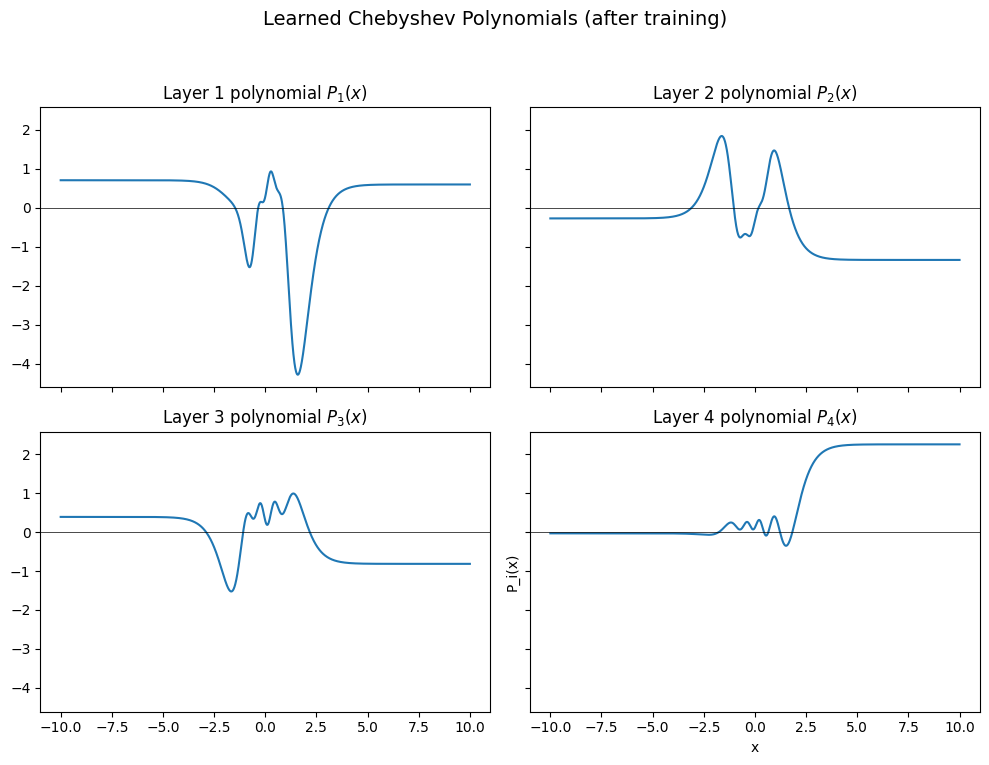

Training complete! Final test accuracy: 95.80%


In [ ]:
# Chebyshev Continuous Activation based Lagrangian Training with Regularization....
# Reaches the accuracy as achieved by using NN alone , hence this joint system training of Chebyshev and Lagrangian NN
# acts as two way substitute to the NN , one via Lagrangian NN and one via Chebyshev NN
# The trained polynomial activation functions are also plotted...

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



class ChebyshevConstrainedNN(nn.Module):
    """
    Neural network whose per-layer Lagrange multipliers are constrained by
    degree-50 Chebyshev polynomials evaluated at Chebyshev nodes.
    The regularizer is removed; constraints are enforced via
        a_i * (W_i @ h_{i-1} + b_i) = P_50^{(i)}(W_i @ h_{i-1} + b_i).
    Architecture (weights/biases/dropout/LayerNorm) stays identical to the original.
    """

    def __init__(self, n_samples, d, *, device="cpu", dropout_rate=0.3,
                 cheb_degree=50):
        super().__init__()
        self.n_samples, self.d = n_samples, d
        self.device, self.cheb_degree = device, cheb_degree

        init_std = np.sqrt(2.0 / d)
        self.W1 = nn.Parameter(torch.randn(d, d, dtype=torch.float64) * init_std)
        self.W2 = nn.Parameter(torch.randn(d, d, dtype=torch.float64) * init_std)
        self.W3 = nn.Parameter(torch.randn(d, d, dtype=torch.float64) * init_std)
        self.W4 = nn.Parameter(torch.randn(d, d, dtype=torch.float64) * init_std)

        self.b1 = nn.Parameter(torch.zeros(d, dtype=torch.float64))
        self.b2 = nn.Parameter(torch.zeros(d, dtype=torch.float64))
        self.b3 = nn.Parameter(torch.zeros(d, dtype=torch.float64))
        self.b4 = nn.Parameter(torch.zeros(d, dtype=torch.float64))

        self.a1_logits = nn.Parameter(torch.randn(n_samples, d, dtype=torch.float64) * 0.001)
        self.a2_logits = nn.Parameter(torch.randn(n_samples, d, dtype=torch.float64) * 0.001)
        self.a3_logits = nn.Parameter(torch.randn(n_samples, d, dtype=torch.float64) * 0.001)
        self.a4_logits = nn.Parameter(torch.randn(n_samples, d, dtype=torch.float64) * 0.001)

        self.cheb_coeffs_1 = nn.Parameter(torch.randn(cheb_degree + 1, dtype=torch.float64) * 0.01)
        self.cheb_coeffs_2 = nn.Parameter(torch.randn(cheb_degree + 1, dtype=torch.float64) * 0.01)
        self.cheb_coeffs_3 = nn.Parameter(torch.randn(cheb_degree + 1, dtype=torch.float64) * 0.01)
        self.cheb_coeffs_4 = nn.Parameter(torch.randn(cheb_degree + 1, dtype=torch.float64) * 0.01)

        self.dropout = nn.Dropout(dropout_rate)
        self.ln1 = nn.LayerNorm(d, dtype=torch.float64)
        self.ln2 = nn.LayerNorm(d, dtype=torch.float64)
        self.ln3 = nn.LayerNorm(d, dtype=torch.float64)

        k = torch.arange(cheb_degree + 1, dtype=torch.float64)
        self.register_buffer("cheb_nodes", torch.cos((2 * k + 1) * np.pi / (2 * (cheb_degree + 1))))


    def _cheb_eval(self, x, coeffs):
        """
        Evaluate Chebyshev polynomial Σ c_n T_n(x) via the stable three-term
        recurrence. x must already be in [-1,1]; we therefore squash inputs
        with tanh before calling this.
        """
        if coeffs.numel() == 0:
            return torch.zeros_like(x)

        T0 = torch.ones_like(x)
        result = coeffs[0] * T0
        if coeffs.numel() == 1:
            return result

        T1 = x
        result = result + coeffs[1] * T1
        for n in range(2, coeffs.numel()):
            T2 = 2 * x * T1 - T0
            result = result + coeffs[n] * T2
            T0, T1 = T1, T2
        return result

    def _constrained_a(self, z, coeffs):
        """
        Compute a_i satisfying a_i * z = P(z)  ⇒ a_i = P(z) / z.
        Adds ε for stability and finally passes through sigmoid
        to keep 0 < a_i < 1.
        """
        Pz = self._cheb_eval(torch.tanh(z), coeffs)
        eps = 1e-8
        z_safe = z + eps * torch.sign(z) + eps * (z == 0).float()
        return torch.sigmoid(Pz / z_safe)

    def forward(self, x, idx_batch=None, *, training=True):
        # Layer 1
        z1 = self.ln1(x @ self.W1.t() + self.b1)
        a1 = self._constrained_a(z1, self.cheb_coeffs_1)
        h1 = a1 * z1
        if training:
            h1 = self.dropout(h1)

        # Layer 2
        z2 = self.ln2(h1 @ self.W2.t() + self.b2)
        a2 = self._constrained_a(z2, self.cheb_coeffs_2)
        h2 = a2 * z2
        if training:
            h2 = self.dropout(h2)

        # Layer 3
        z3 = self.ln3(h2 @ self.W3.t() + self.b3)
        a3 = self._constrained_a(z3, self.cheb_coeffs_3)
        h3 = a3 * z3
        if training:
            h3 = self.dropout(h3)

        # Layer 4 & output
        z4 = h3 @ self.W4.t() + self.b4
        a4 = self._constrained_a(z4, self.cheb_coeffs_4)
        return a4 * z4


def evaluate_model(model, input_vectors, labels,
                   target_vectors=None, *, batch_size=1000, device="cpu"):
    """
    Returns (accuracy, mse_or_None). If target_vectors is None, MSE is skipped.
    Classification rule : argmax(out) // 7
    """
    model.eval()
    loss_fn = nn.MSELoss()
    preds, losses = [], []

    with torch.no_grad():
        for start in range(0, len(input_vectors), batch_size):
            end = min(start + batch_size, len(input_vectors))
            idx = torch.arange(start, end, device=device)
            xb = input_vectors[idx]
            out = model(xb, idx, training=False)

            preds.append((torch.argmax(out, dim=1) // 7))

            if target_vectors is not None:
                tv = target_vectors[idx]
                losses.append(loss_fn(out, tv))

    acc = (torch.cat(preds) == labels.to(device)).float().mean().item() * 100
    mse = None if target_vectors is None else torch.stack(losses).mean().item()
    return acc, mse


def train_model(input_state_vectors, target_states, labels_train,
                test_input_vectors, test_labels, *,
                batch_size=256, n_epochs=1000, lr=5e-4, device="cpu",
                weight_decay=1e-4, dropout_rate=0.1, patience=15,
                validation_split=0.2, cheb_degree=50):
    """
    Trains the Chebyshev-constrained network and returns (model, history).
    """

    n_samples, d = input_state_vectors.shape
    train_idx, val_idx = train_test_split(
        np.arange(n_samples),
        test_size=validation_split,
        random_state=42,
        stratify=labels_train.cpu().numpy()
    )

    model = ChebyshevConstrainedNN(
        n_samples=n_samples, d=d, device=device,
        dropout_rate=dropout_rate, cheb_degree=cheb_degree
    ).to(device)

    opt = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    sched = optim.lr_scheduler.ReduceLROnPlateau(
        opt, mode="min", patience=5, factor=0.7, min_lr=1e-6
    )
    loss_fn = nn.CrossEntropyLoss()
    slice_ = lambda t, idx: t[idx].to(device)

    best_val, patience_ctr = np.inf, 0
    history = {"train_acc": [], "val_acc": [], "test_acc": [],
               "train_loss": [], "val_loss": []}

    print(f"Training with degree-{cheb_degree} Chebyshev constraints…")

    for epoch in range(n_epochs):
        model.train()
        perm = torch.randperm(len(train_idx))
        batch_losses = []

        for b in range(0, len(train_idx), batch_size):
            idx_sub = perm[b:b + batch_size]
            abs_idx = torch.tensor(train_idx, device=device)[idx_sub]

            xb = slice_(input_state_vectors, abs_idx)
            yb = slice_(target_states, abs_idx)

            opt.zero_grad()
            loss = loss_fn(model(xb, abs_idx, training=True), yb)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            opt.step()
            batch_losses.append(loss.item())

        train_loss = float(np.mean(batch_losses))

        train_acc, _ = evaluate_model(
            model,
            slice_(input_state_vectors, torch.tensor(train_idx, device=device)),
            slice_(labels_train, torch.tensor(train_idx, device=device)),
            target_vectors=slice_(target_states, torch.tensor(train_idx, device=device)),
            batch_size=batch_size, device=device)

        val_acc, val_loss = evaluate_model(
            model,
            slice_(input_state_vectors, torch.tensor(val_idx, device=device)),
            slice_(labels_train, torch.tensor(val_idx, device=device)),
            target_vectors=slice_(target_states, torch.tensor(val_idx, device=device)),
            batch_size=batch_size, device=device)

        test_acc, _ = evaluate_model(
            model, test_input_vectors.to(device), test_labels.to(device),
            target_vectors=None, batch_size=batch_size, device=device)

        sched.step(val_loss)
        history["train_acc"].append(train_acc); history["val_acc"].append(val_acc)
        history["test_acc"].append(test_acc)
        history["train_loss"].append(train_loss); history["val_loss"].append(val_loss)


        if epoch % 10 == 0 or epoch < 10:
            print(f"Ep {epoch+1:4d} | TrainL {train_loss:.4e} | "
                  f"TrainA {train_acc:5.2f}% | ValA {val_acc:5.2f}% | TestA {test_acc:5.2f}%")

    return model, history

def cheb_eval(x: torch.Tensor, coeffs: torch.Tensor) -> torch.Tensor:
    if coeffs.numel() == 0:
        return torch.zeros_like(x)

    # T_0, T_1
    T0 = torch.ones_like(x)
    result = coeffs[0] * T0
    if coeffs.numel() == 1:
        return result

    T1 = x
    result = result + coeffs[1] * T1
    for n in range(2, coeffs.numel()):
        T2 = 2 * x * T1 - T0          # recurrence: T_n(x) = 2x T_{n-1}(x) – T_{n-2}(x)
        result = result + coeffs[n] * T2
        T0, T1 = T1, T2
    return result

def plot_trained_chebyshev(net: ChebyshevConstrainedNN, *,
                           x_lo=-10, x_hi=10, num=2000):
    """
    Draws four 2-D plots of P_i(x) on [x_lo, x_hi].
    """
    net.eval()
    xs = torch.linspace(x_lo, x_hi, num, dtype=torch.float64)
    xs_tanh = torch.tanh(xs) 

    coeff_sets = [
        net.cheb_coeffs_1.detach().cpu(),
        net.cheb_coeffs_2.detach().cpu(),
        net.cheb_coeffs_3.detach().cpu(),
        net.cheb_coeffs_4.detach().cpu(),
    ]
    fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
    axes = axes.ravel()
    for i, (ax, coeffs) in enumerate(zip(axes, coeff_sets), 1):
        ys = net._cheb_eval(xs_tanh, coeffs).numpy()
        ax.plot(xs.numpy(), ys, lw=1.5)
        ax.set_title(f"Layer {i} polynomial $P_{i}(x)$")
        ax.axhline(0, color="k", lw=.5)
    fig.suptitle("Learned Chebyshev Polynomials (after training)", fontsize=14)
    plt.xlabel("x"); plt.ylabel("P_i(x)")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    input_state_vectors_tensor = torch.tensor(input_state_vectors, dtype=torch.float64)
    target_states_tensor       = torch.tensor(target_states_combined, dtype=torch.float64)
    labels_train_tensor        = torch.tensor(labels_new_train, dtype=torch.long)
    test_input_tensor          = torch.tensor(
        input_state_test_vectors.reshape(10_000, 64), dtype=torch.float64)
    test_labels_tensor         = torch.tensor(labelss, dtype=torch.long)
    trained_model, hist = train_model(
        input_state_vectors_tensor,
        target_states_tensor,
        labels_train_tensor,
        test_input_tensor,
        test_labels_tensor,
        batch_size=5000, n_epochs=100, lr=5e-3,
        device=device, weight_decay=1e-6, dropout_rate=0.1,
        patience=1, validation_split=0.2, cheb_degree=10)
    plot_trained_chebyshev(trained_model, x_lo=-10, x_hi=10)
    print("Training complete! Final test accuracy:",
          f"{hist['test_acc'][-1]:.2f}%")

# Plotted Activation Functions ...
# Here though the Lagrangian Vectors per layer lie on the same manifold of the Chebyshev Activstion in that layer, we have no means other 
# than frequentist approach to infer on the test data , as we dont know the Lagragian vectors for it , unless we pass it throught the 
# the chebyshev Activation and find the Lagrangian Vectors explicitly for the test vectors and hence further reaseach is needed to get SOTA
# out of just the Lagrangian NN , in loss function or the frequentist approach (this can also help in SOTA Paper of HQAI direct training , or Quantum Everett NN 
# Frequentist approach of HQAI)

#

In [1]:
# CIFAR Dataset Preprocessing 
import os
import pickle
import numpy as np
import torch
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pathlib import Path
import torch.nn.functional as F

DATA_ROOT = r'C:\Users\Akshay Patil\Desktop\cifar-10-python\cifar-10-batches-py'
CIFAR_MEAN = (0.4914, 0.4822, 0.4465)
CIFAR_STD = (0.2470, 0.2435, 0.2616)

def load_cifar_batch(file_path):
    with open(file_path, 'rb') as f:
        batch = pickle.load(f, encoding='latin1')
    images = batch['data'].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
    labels = batch['labels']
    return images, labels

class TestDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = Path(root_dir)
        self.transform = transform
        self.image_files = sorted(self.root_dir.glob('*.png'), 
                                 key=lambda x: int(x.stem.split('_')[1]))
        
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, idx):
        img_path = self.image_files[idx]
        image = Image.open(img_path)
        if self.transform:
            image = self.transform(image)
        return image

def generate_sample_data():
    train_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(CIFAR_MEAN, CIFAR_STD)
    ])
    
    test_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(CIFAR_MEAN, CIFAR_STD)
    ])

    trainset = torchvision.datasets.ImageFolder(
        root=str(Path(DATA_ROOT) / 'train_organized'),
        transform=train_transform
    )
    trainloader = DataLoader(trainset, batch_size=60000, shuffle=False)
    input_images, class_labels = next(iter(trainloader))
    
    testset = TestDataset(
        root_dir=Path(DATA_ROOT) / 'test_original',
        transform=test_transform
    )
    testloader = DataLoader(testset, batch_size=10000, shuffle=False)
    test_images = next(iter(testloader))
    
    # Load test labels from original test batch
    _, test_labels = load_cifar_batch(Path(DATA_ROOT) / 'test_batch')
    test_labels = torch.tensor(test_labels, dtype=torch.long)
    
    return input_images, class_labels, test_images, test_labels

if __name__ == '__main__':
    target_states_combined = np.zeros((49999, 3072), dtype=np.float16)
    target_states_combined[0:4999, 0] = 1
    target_states_combined[4999:9999, 341] = 1
    target_states_combined[9999:14999, 682] = 1
    target_states_combined[14999:19999, 1023] = 1
    target_states_combined[19999:24999, 1364] = 1
    target_states_combined[24999:29999, 1705] = 1
    target_states_combined[29999:34999, 2046] = 1
    target_states_combined[34999:39999, 2387] = 1
    target_states_combined[39999:44999, 2728] = 1
    target_states_combined[44999:49999, 3071] = 1


    target_states_combined = torch.tensor(target_states_combined, dtype=torch.float16)
    train_images, train_labels, test_images, test_labels = generate_sample_data()
    train_images = train_images.reshape(49999,3*1024)
    test_images = test_images.reshape(10000,3*1024)
    train_images = F.normalize(train_images,p=2,dim=1)
    test_images = F.normalize(test_images,p=2,dim=1)
    print(f"Training data shape: {train_images.shape}")
    print(f"Training labels shape: {train_labels.shape}")
    print(f"Test data shape: {test_images.shape}")
    print(f"Test labels shape: {test_labels.shape}")

Training data shape: torch.Size([49999, 3072])
Training labels shape: torch.Size([49999])
Test data shape: torch.Size([10000, 3072])
Test labels shape: torch.Size([10000])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class ChebyshevConstrainedNN(nn.Module):
    """
    Neural network whose per-layer Lagrange multipliers are constrained by
    degree-50 Chebyshev polynomials evaluated at Chebyshev nodes.
    The regularizer is removed; constraints are enforced via
        a_i * (W_i @ h_{i-1} + b_i) = P_50^{(i)}(W_i @ h_{i-1} + b_i).
    """

    def __init__(self, n_samples, d, *, device="cpu", dropout_rate=0.3,
                 cheb_degree=50):
        super().__init__()
        self.n_samples, self.d = n_samples, d
        self.device, self.cheb_degree = device, cheb_degree

        init_std = np.sqrt(2.0 / d)
        self.W1 = nn.Parameter(torch.randn(d, d, dtype=torch.float64) * init_std)
        self.W2 = nn.Parameter(torch.randn(d, d, dtype=torch.float64) * init_std)
        self.W3 = nn.Parameter(torch.randn(d, d, dtype=torch.float64) * init_std)
        self.W4 = nn.Parameter(torch.randn(d, d, dtype=torch.float64) * init_std)


        self.b1 = nn.Parameter(torch.zeros(d, dtype=torch.float64))
        self.b2 = nn.Parameter(torch.zeros(d, dtype=torch.float64))
        self.b3 = nn.Parameter(torch.zeros(d, dtype=torch.float64))
        self.b4 = nn.Parameter(torch.zeros(d, dtype=torch.float64))

        self.a1_logits = nn.Parameter(torch.randn(n_samples, d, dtype=torch.float64) * 0.001)
        self.a2_logits = nn.Parameter(torch.randn(n_samples, d, dtype=torch.float64) * 0.001)
        self.a3_logits = nn.Parameter(torch.randn(n_samples, d, dtype=torch.float64) * 0.001)
        self.a4_logits = nn.Parameter(torch.randn(n_samples, d, dtype=torch.float64) * 0.001)

        self.cheb_coeffs_1 = nn.Parameter(torch.randn(cheb_degree + 1, dtype=torch.float64) * 0.01)
        self.cheb_coeffs_2 = nn.Parameter(torch.randn(cheb_degree + 1, dtype=torch.float64) * 0.01)
        self.cheb_coeffs_3 = nn.Parameter(torch.randn(cheb_degree + 1, dtype=torch.float64) * 0.01)
        self.cheb_coeffs_4 = nn.Parameter(torch.randn(cheb_degree + 1, dtype=torch.float64) * 0.01)

        self.dropout = nn.Dropout(dropout_rate)
        self.ln1 = nn.LayerNorm(d, dtype=torch.float64)
        self.ln2 = nn.LayerNorm(d, dtype=torch.float64)
        self.ln3 = nn.LayerNorm(d, dtype=torch.float64)

        k = torch.arange(cheb_degree + 1, dtype=torch.float64)
        self.register_buffer("cheb_nodes", torch.cos((2 * k + 1) * np.pi / (2 * (cheb_degree + 1))))


    def _cheb_eval(self, x, coeffs):
        """
        Evaluate Chebyshev polynomial Σ c_n T_n(x) via the stable three-term
        recurrence. x must already be in [-1,1]; we therefore squash inputs
        with tanh before calling this.
        """
        if coeffs.numel() == 0:
            return torch.zeros_like(x)

        T0 = torch.ones_like(x)
        result = coeffs[0] * T0
        if coeffs.numel() == 1:
            return result

        T1 = x
        result = result + coeffs[1] * T1
        for n in range(2, coeffs.numel()):
            T2 = 2 * x * T1 - T0
            result = result + coeffs[n] * T2
            T0, T1 = T1, T2
        return result

    def _constrained_a(self, z, coeffs):
        """
        Compute a_i satisfying a_i * z = P(z)  ⇒ a_i = P(z) / z.
        Adds ε for stability and finally passes through sigmoid
        to keep 0 < a_i < 1.
        """
        Pz = self._cheb_eval(torch.tanh(z), coeffs)
        eps = 1e-8
        z_safe = z + eps * torch.sign(z) + eps * (z == 0).float()
        return torch.sigmoid(Pz / z_safe)

    def forward(self, x, idx_batch=None, *, training=True):
        # Layer 1
        z1 = self.ln1(x @ self.W1.t() + self.b1)
        a1 = self._constrained_a(z1, self.cheb_coeffs_1)
        h1 = a1 * z1
        if training:
            h1 = self.dropout(h1)

        # Layer 2
        z2 = self.ln2(h1 @ self.W2.t() + self.b2)
        a2 = self._constrained_a(z2, self.cheb_coeffs_2)
        h2 = a2 * z2
        if training:
            h2 = self.dropout(h2)

        # Layer 3
        z3 = self.ln3(h2 @ self.W3.t() + self.b3)
        a3 = self._constrained_a(z3, self.cheb_coeffs_3)
        h3 = a3 * z3
        if training:
            h3 = self.dropout(h3)

        # Layer 4 & output
        z4 = h3 @ self.W4.t() + self.b4
        a4 = self._constrained_a(z4, self.cheb_coeffs_4)
        return a4 * z4


def evaluate_model(model, input_vectors, labels,
                   target_vectors=None, *, batch_size=1000, device="cpu"):
    """
    Returns (accuracy, mse_or_None). If target_vectors is None, MSE is skipped.
    Classification rule (same as original): argmax(out) // 341
    """
    model.eval()
    loss_fn = nn.CrossEntropyLoss()
    preds, losses = [], []

    with torch.no_grad():
        for start in range(0, len(input_vectors), batch_size):
            end = min(start + batch_size, len(input_vectors))
            idx = torch.arange(start, end, device=device)
            xb = input_vectors[idx]
            out = model(xb, idx, training=False)

            preds.append((torch.argmax(out, dim=1) // 341))

            if target_vectors is not None:
                tv = target_vectors[idx]
                losses.append(loss_fn(out, tv))

    acc = (torch.cat(preds) == labels.to(device)).float().mean().item() * 100
    mse = None if target_vectors is None else torch.stack(losses).mean().item()
    return acc, mse


def train_model(input_state_vectors, target_states, labels_train,
                test_input_vectors, test_labels, *,
                batch_size=256, n_epochs=1000, lr=5e-4, device="cpu",
                weight_decay=1e-4, dropout_rate=0.1, patience=15,
                validation_split=0.2, cheb_degree=50):
    """
    Trains the Chebyshev-constrained network and returns (model, history).
    """

    n_samples, d = input_state_vectors.shape
    train_idx, val_idx = train_test_split(
        np.arange(n_samples),
        test_size=validation_split,
        random_state=42,
        stratify=labels_train.cpu().numpy()
    )

    model = ChebyshevConstrainedNN(
        n_samples=n_samples, d=d, device=device,
        dropout_rate=dropout_rate, cheb_degree=cheb_degree
    ).to(device)

    opt = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    sched = optim.lr_scheduler.ReduceLROnPlateau(
        opt, mode="min", patience=5, factor=0.7, min_lr=1e-6
    )
    loss_fn = nn.CrossEntropyLoss()
    slice_ = lambda t, idx: t[idx].to(device)

    best_val, patience_ctr = np.inf, 0
    history = {"train_acc": [], "val_acc": [], "test_acc": [],
               "train_loss": [], "val_loss": []}

    print(f"Training with degree-{cheb_degree} Chebyshev constraints…")

    for epoch in range(n_epochs):
        model.train()
        perm = torch.randperm(len(train_idx))
        batch_losses = []

        for b in range(0, len(train_idx), batch_size):
            idx_sub = perm[b:b + batch_size]
            abs_idx = torch.tensor(train_idx, device=device)[idx_sub]

            xb = slice_(input_state_vectors, abs_idx)
            yb = slice_(target_states, abs_idx)

            opt.zero_grad()
            loss = loss_fn(model(xb, abs_idx, training=True), yb)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            opt.step()
            batch_losses.append(loss.item())

        train_loss = float(np.mean(batch_losses))

        train_acc, _ = evaluate_model(
            model,
            slice_(input_state_vectors, torch.tensor(train_idx, device=device)),
            slice_(labels_train, torch.tensor(train_idx, device=device)),
            target_vectors=slice_(target_states, torch.tensor(train_idx, device=device)),
            batch_size=batch_size, device=device)

        val_acc, val_loss = evaluate_model(
            model,
            slice_(input_state_vectors, torch.tensor(val_idx, device=device)),
            slice_(labels_train, torch.tensor(val_idx, device=device)),
            target_vectors=slice_(target_states, torch.tensor(val_idx, device=device)),
            batch_size=batch_size, device=device)

        test_acc, _ = evaluate_model(
            model, test_input_vectors.to(device), test_labels.to(device),
            target_vectors=None, batch_size=batch_size, device=device)

        sched.step(val_loss)
        history["train_acc"].append(train_acc); history["val_acc"].append(val_acc)
        history["test_acc"].append(test_acc)
        history["train_loss"].append(train_loss); history["val_loss"].append(val_loss)


        if epoch % 10 == 0 or epoch < 10:
            print(f"Ep {epoch+1:4d} | TrainL {train_loss:.4e} | "
                  f"TrainA {train_acc:5.2f}% | ValA {val_acc:5.2f}% | TestA {test_acc:5.2f}%")

    return model, history

def cheb_eval(x: torch.Tensor, coeffs: torch.Tensor) -> torch.Tensor:
    """
    Evaluate a Chebyshev polynomial given its coefficients.

    Args
    ----
    x       : tensor of shape (..., ) already in the range [-1, 1]
    coeffs  : tensor of shape (deg + 1, ) - c_0 … c_deg

    Returns
    -------
    Tensor with the same shape as x containing P(x) = Σ c_n T_n(x)
    """
    if coeffs.numel() == 0:
        return torch.zeros_like(x)

    # T_0, T_1
    T0 = torch.ones_like(x)
    result = coeffs[0] * T0
    if coeffs.numel() == 1:
        return result

    T1 = x
    result = result + coeffs[1] * T1
    for n in range(2, coeffs.numel()):
        T2 = 2 * x * T1 - T0          # recurrence: T_n(x) = 2x T_{n-1}(x) – T_{n-2}(x)
        result = result + coeffs[n] * T2
        T0, T1 = T1, T2
    return result

def plot_trained_chebyshev(net: ChebyshevConstrainedNN, *,
                           x_lo=-10, x_hi=10, num=2000):
    """
    Draws four 2-D plots of P_i(x) on [x_lo, x_hi].
    """
    net.eval()
    xs = torch.linspace(x_lo, x_hi, num, dtype=torch.float64)
    xs_tanh = torch.tanh(xs) 

    coeff_sets = [
        net.cheb_coeffs_1.detach().cpu(),
        net.cheb_coeffs_2.detach().cpu(),
        net.cheb_coeffs_3.detach().cpu(),
        net.cheb_coeffs_4.detach().cpu(),
    ]
    fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
    axes = axes.ravel()
    for i, (ax, coeffs) in enumerate(zip(axes, coeff_sets), 1):
        ys = net._cheb_eval(xs_tanh, coeffs).numpy()
        ax.plot(xs.numpy(), ys, lw=1.5)
        ax.set_title(f"Layer {i} polynomial $P_{i}(x)$")
        ax.axhline(0, color="k", lw=.5)
    fig.suptitle("Learned Chebyshev Polynomials (after training)", fontsize=14)
    plt.xlabel("x"); plt.ylabel("P_i(x)")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    input_state_vectors_tensor = torch.tensor(train_images, dtype=torch.float64)
    target_states_tensor       = torch.tensor(target_states_combined, dtype=torch.float64)
    labels_train_tensor        = torch.tensor(train_labels, dtype=torch.long)
    test_input_tensor          = torch.tensor(
        test_images, dtype=torch.float64)
    test_labels_tensor         = torch.tensor(test_labels, dtype=torch.long)

    trained_model, hist = train_model(
        input_state_vectors_tensor,
        target_states_tensor,
        labels_train_tensor,
        test_input_tensor,
        test_labels_tensor,
        batch_size=256, n_epochs=500, lr=1e-2,
        device=device, weight_decay=1e-6, dropout_rate=0.1,
        patience=1, validation_split=0.2, cheb_degree=15)
    plot_trained_chebyshev(trained_model, x_lo=-10, x_hi=10)
    print("Training complete! Final test accuracy:",
          f"{hist['test_acc'][-1]:.2f}%")

# Also one can change the width and depth of the architechture and instead of target states combined use one hot label encoding
# Here more deeper Lagragian as well Chebyshev NN can be used , also instead of basic NN , one can use Convolutional Lagrangian/Chebyshev NN , 
# or Transformer Lagrangian/Chebyshev NN terms coined based on this work... for getting higher accuracy of classification...


C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_9272\36314733.py:288: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_state_vectors_tensor = torch.tensor(train_images, dtype=torch.float64)
C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_9272\36314733.py:289: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target_states_tensor       = torch.tensor(target_states_combined, dtype=torch.float64)
C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_9272\36314733.py:290: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels_train_tensor    

Training with degree-15 Chebyshev constraints…
Ep    1 | TrainL 2.3409e+00 | TrainA 36.12% | ValA 35.80% | TestA 35.56%
Ep    2 | TrainL 1.7006e+00 | TrainA 43.02% | ValA 41.39% | TestA 40.66%
Ep    3 | TrainL 1.5826e+00 | TrainA 47.72% | ValA 44.69% | TestA 44.73%
Ep    4 | TrainL 1.4880e+00 | TrainA 50.60% | ValA 46.23% | TestA 46.58%
Ep    5 | TrainL 1.4193e+00 | TrainA 54.30% | ValA 48.15% | TestA 48.43%
Ep    6 | TrainL 1.3766e+00 | TrainA 55.02% | ValA 48.52% | TestA 48.27%
Ep    7 | TrainL 1.3197e+00 | TrainA 55.63% | ValA 47.77% | TestA 47.54%
Ep    8 | TrainL 1.2530e+00 | TrainA 60.81% | ValA 50.32% | TestA 50.74%


In [ ]:
# One can also increase the number of layers in the above NN to get more accuracy or try different architechture
# Convolutional Lagrangian Per sample + Chebyshev NN , VIT Lagrangian + Chebhyshev NN , and other existing Architechtures to get Both Probabilistic and 
# Deterministic Exact Equations of NN ....
